<a href="https://colab.research.google.com/github/galileoChr/Projects_galileo/blob/main/Advanced_No_Reversal_Days_Analysis_XAUUSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analysis of No-Reversal Days in Asian Session and Overlap for XAUUSD Data

This notebook explores the probability and identifies the days with no reversals throughout the Asian session and Asian-London overlap.

## Key Findings:
- Days with at least one reversal in the Asian session + overlap: 233
- Days with no reversals in the entire session + overlap: 42


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = 'PERIOD_H1(Trading_Sessions_RangeVersion,0).CSV'
data = pd.read_csv(file_path, encoding='utf-16', low_memory=False)

# Display the first few rows to verify the structure
data.head()


,Date,Time of Day,Day of Week,Day of Month,Week of Month,Session,Session Overlap,ZigZag Current,ZigZag Previous,ZigZag Next,ZigZag Retracement,Price Open,Reversed,Asian Range Size,London Range Size,New York Range Size,Timezone
0,2021.01.04,01:00,MONDAY,4,1,New York - 0,False,0.0,0.0,0.0,0.0,1914.93,False,0.0,0.0,1017.0,GMT+2
1,2021.01.04,02:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,1913.64,False,2300.0,0.0,1017.0,GMT+2
2,2021.01.04,03:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,1918.71,False,2300.0,0.0,1017.0,GMT+2
3,2021.01.04,04:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,1921.89,False,2300.0,0.0,1017.0,GMT+2
4,2021.01.04,05:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,1925.26,False,2300.0,0.0,0.0,GMT+2


In [ ]:

# Filter the data to include only Asian session and Asian-London overlap
asian_and_overlap_data = data[(data['Session'] == 'Asian') | (data['Session'] == 'Asian/London')]

# Check days with at least one reversal in Asian session + overlap
reversal_check = asian_and_overlap_data.groupby('Date')['Reversed'].any()
days_with_reversal_count = reversal_check.sum()  # days with at least one True in 'Reversed'
days_with_no_reversal_count = len(reversal_check) - days_with_reversal_count  # total days minus days with reversal

# New variable: Count of all true reversals, regardless of uniqueness by day
all_reversals_check = asian_and_overlap_data['Reversed'].sum()  # total number of True in 'Reversed'

# Display counts
days_with_reversal_count, days_with_no_reversal_count, all_reversals_check


(900, 105, 1702)

In [ ]:

# List dates with no reversals throughout the session and overlap
days_with_no_reversals = reversal_check[reversal_check == False].index.tolist()

# Filter the data for these no-reversal days
no_reversal_data = asian_and_overlap_data[asian_and_overlap_data['Date'].isin(days_with_no_reversals)]

no_reversal_data.tail(10)


,Date,Time of Day,Day of Week,Day of Month,Week of Month,Session,Session Overlap,ZigZag Current,ZigZag Previous,ZigZag Next,ZigZag Retracement,Price Open,Reversed,Asian Range Size,London Range Size,New York Range Size,Timezone
22714,2024.11.04,02:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,2740.98,False,1271.0,0.0,2570.0,GMT+2
22715,2024.11.04,03:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,2741.33,False,1271.0,0.0,0.0,GMT+2
22716,2024.11.04,04:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,2740.96,False,1271.0,0.0,0.0,GMT+2
22717,2024.11.04,05:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,2742.41,False,1271.0,0.0,0.0,GMT+2
22718,2024.11.04,06:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,2742.13,False,1271.0,0.0,0.0,GMT+2
22719,2024.11.04,07:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,2743.68,False,1271.0,0.0,0.0,GMT+2
22720,2024.11.04,08:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,2741.62,False,1271.0,0.0,0.0,GMT+2
22721,2024.11.04,09:00,MONDAY,4,1,Asian,False,0.0,0.0,0.0,0.0,2744.75,False,1271.0,0.0,0.0,GMT+2
22722,2024.11.04,10:00,MONDAY,4,1,Asian/London,True,0.0,0.0,0.0,0.0,2738.42,False,1271.0,1579.0,0.0,GMT+2
22723,2024.11.04,11:00,MONDAY,4,1,Asian/London,True,0.0,0.0,0.0,0.0,2744.04,False,1271.0,1579.0,0.0,GMT+2


In [ ]:
# Create a list of dates with at least one reversal in the specified sessions
days_with_reversal = reversal_check[reversal_check == True].index.tolist()

print(len(days_with_reversal))

# Filter the data for these only-reversal days
data_with_only_reversals = asian_and_overlap_data[asian_and_overlap_data['Date'].isin(days_with_reversal)]

data_with_only_reversals.tail(10)


900


,Date,Time of Day,Day of Week,Day of Month,Week of Month,Session,Session Overlap,ZigZag Current,ZigZag Previous,ZigZag Next,ZigZag Retracement,Price Open,Reversed,Asian Range Size,London Range Size,New York Range Size,Timezone
23013,2024.11.21,02:00,THURSDAY,21,3,Asian,False,0.00,0.00,0.00,0.00,2658.82,False,2128.0,0.0,0.0,GMT+2
23014,2024.11.21,03:00,THURSDAY,21,3,Asian,False,2660.41,2645.40,2650.38,66.82,2660.41,True,2128.0,0.0,0.0,GMT+2
23015,2024.11.21,04:00,THURSDAY,21,3,Asian,False,0.00,0.00,0.00,0.00,2658.23,False,2128.0,0.0,0.0,GMT+2
23016,2024.11.21,05:00,THURSDAY,21,3,Asian,False,2650.38,2660.41,2673.47,230.21,2657.14,True,2128.0,0.0,0.0,GMT+2
23017,2024.11.21,06:00,THURSDAY,21,3,Asian,False,0.00,0.00,0.00,0.00,2658.93,False,2128.0,0.0,0.0,GMT+2
23018,2024.11.21,07:00,THURSDAY,21,3,Asian,False,0.00,0.00,0.00,0.00,2658.14,False,2128.0,0.0,0.0,GMT+2
23019,2024.11.21,08:00,THURSDAY,21,3,Asian,False,0.00,0.00,0.00,0.00,2662.19,False,2128.0,0.0,0.0,GMT+2
23020,2024.11.21,09:00,THURSDAY,21,3,Asian,False,0.00,0.00,0.00,0.00,2664.48,False,2128.0,0.0,0.0,GMT+2
23021,2024.11.21,10:00,THURSDAY,21,3,Asian/London,True,0.00,0.00,0.00,0.00,2670.32,False,2128.0,1301.0,0.0,GMT+2
23022,2024.11.21,11:00,THURSDAY,21,3,Asian/London,True,0.00,0.00,0.00,0.00,2671.66,False,2128.0,1301.0,0.0,GMT+2



# Advanced Analysis of Reversals and Retracements in the Asian Session and Overlap for XAUUSD

This notebook performs a deeper analysis of reversals and significant retracements (68%+) within the Asian session and Asian-London overlap.
We will cover:
1. The probability of reversals in this session.
2. The probability and occurrence of retracements of 68% or more, analyzing which days of the week and which weeks in the month experience these occurrences more frequently.

### Step-by-Step Breakdown


Total Days: 1005, Days with Reversals: 900
Probability of Reversal: 89.55%


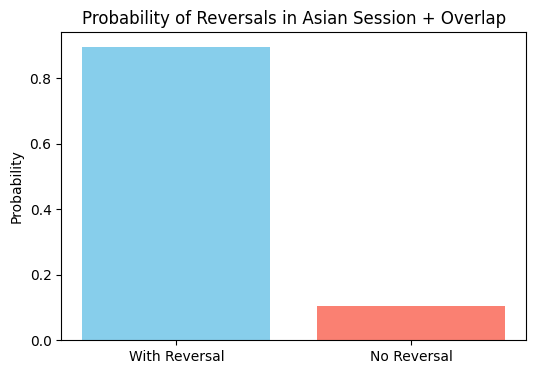

In [ ]:

# Calculate probability of reversals in the Asian session + overlap
total_days = len(reversal_check)
reversal_days = days_with_reversal_count
probability_of_reversal = reversal_days / total_days

# Display results
print(f"Total Days: {total_days}, Days with Reversals: {reversal_days}")
print(f"Probability of Reversal: {probability_of_reversal:.2%}")

# Visualization
plt.figure(figsize=(6, 4))
plt.bar(['With Reversal', 'No Reversal'], [probability_of_reversal, 1 - probability_of_reversal], color=['skyblue', 'salmon'])
plt.title('Probability of Reversals in Asian Session + Overlap')
plt.ylabel('Probability')
plt.show()


Total Days with 68%+ Retracement [unique]: 838
Total Days with 68%+ Retracement [all reversals]: 1360
Probability of 68%+ Retracement: 79.91%


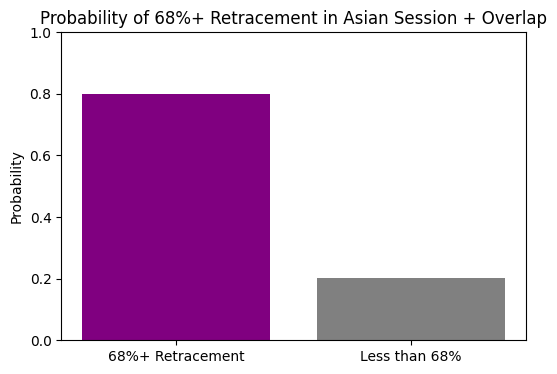

In [ ]:

# Filter the data with only reversals for retracements of 68%+
retracement_68_data = data_with_only_reversals[data_with_only_reversals['ZigZag Retracement'] >= 68]

# Count unique days with 68%+ retracements, ensuring each day is counted only once
unique_days_with_68_retracement = retracement_68_data['Date'].nunique()

# Calculate the probability using the total number of days with at least one reversal
total_days_with_reversals = data_with_only_reversals['Date'].nunique()
probability_of_68_retracement = len(retracement_68_data) / all_reversals_check

# Display the results
total_days_with_reversals, unique_days_with_68_retracement, probability_of_68_retracement

# Print the updated results
print(f"Total Days with 68%+ Retracement [unique]: {unique_days_with_68_retracement}")
print(f"Total Days with 68%+ Retracement [all reversals]: {len(retracement_68_data)}")
print(f"Probability of 68%+ Retracement: {probability_of_68_retracement:.2%}")

plt.figure(figsize=(6, 4))
plt.bar(['68%+ Retracement', 'Less than 68%'], [probability_of_68_retracement, 1 - probability_of_68_retracement], color=['purple', 'gray'])
plt.title('Probability of 68%+ Retracement in Asian Session + Overlap')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Set y-axis to go from 0 to 1 to show probabilities clearly
plt.show()



In [ ]:
# Filter the data with only reversals for retracements of less than 68%
retracement_below_68_data = data_with_only_reversals[(data_with_only_reversals['ZigZag Retracement'] < 68) &
                                                     (data_with_only_reversals['ZigZag Retracement'] > 0)]

# Count unique days with less than 68% retracements, ensuring each day is counted only once [not used]
unique_days_with_below_68_retracement = retracement_below_68_data['Date'].nunique()

# Calculate the probability of days with less than 68% retracements
probability_of_below_68_retracement = len(retracement_below_68_data) / all_reversals_check

# Display the results for less than 68% retracements
print("Analysis of Retracements Less Than 68%:")
print(f"Total Unique Days with Less Than 68% Retracement: {unique_days_with_below_68_retracement}")
print(f"Total Days with Less Than 68% Retracement [ regardless of uniqueness by day]: {len(retracement_below_68_data)}")
print(f"Probability of Less Than 68% Retracement: {probability_of_below_68_retracement:.2%}")

# Optional: Example data for days with less than 68% retracements (first 10 rows)
examples_below_68 = retracement_below_68_data.tail(10)
print("\nExamples of Retracements Less Than 68%:")
print(examples_below_68)


Analysis of Retracements Less Than 68%:
Total Unique Days with Less Than 68% Retracement: 319
Total Days with Less Than 68% Retracement [ regardless of uniqueness by day]: 342
Probability of Less Than 68% Retracement: 20.09%

Examples of Retracements Less Than 68%:
             Date Time of Day Day of Week  Day of Month  Week of Month  \
22353  2024.10.11       09:00      FRIDAY            11              2   
22467  2024.10.18       08:00      FRIDAY            18              3   
22581  2024.10.25       07:00      FRIDAY            25              4   
22625  2024.10.29       04:00     TUESDAY            29              5   
22806  2024.11.08       02:00      FRIDAY             8              2   
22831  2024.11.11       04:00      MONDAY            11              2   
22878  2024.11.13       05:00   WEDNESDAY            13              2   
22907  2024.11.14       11:00    THURSDAY            14              2   
22945  2024.11.18       03:00      MONDAY            18             

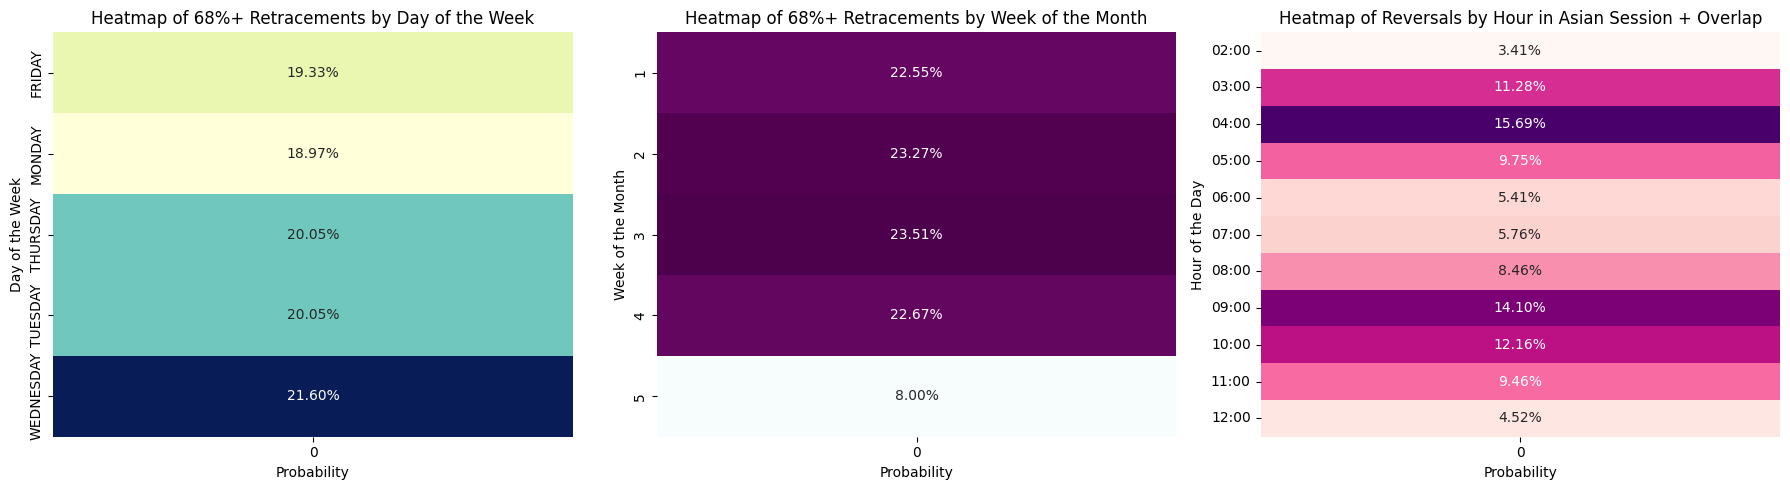

In [ ]:
# Prepare data for heatmap visualization

# Analysis by day of the week for unique 68%+ retracement days
retracement_by_day = retracement_68_data.drop_duplicates(subset='Date')['Day of Week'].value_counts(normalize=True).sort_index()

# Analysis by week of the month for unique 68%+ retracement days
retracement_by_week = retracement_68_data.drop_duplicates(subset='Date')['Week of Month'].value_counts(normalize=True).sort_index()

# Analysis by hour of the day for reversals (using data with only reversals)
reversals_by_hour = data_with_only_reversals[data_with_only_reversals['Reversed'] == True]['Time of Day'].value_counts(normalize=True).sort_index()

# Plotting the heatmaps
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Day of the Week Heatmap
sns.heatmap(retracement_by_day.values.reshape(-1, 1), annot=True, fmt=".2%", cmap="YlGnBu", cbar=False, ax=axs[0], yticklabels=retracement_by_day.index)
axs[0].set_title('Heatmap of 68%+ Retracements by Day of the Week')
axs[0].set_xlabel('Probability')
axs[0].set_ylabel('Day of the Week')

# Week of the Month Heatmap
sns.heatmap(retracement_by_week.values.reshape(-1, 1), annot=True, fmt=".2%", cmap="BuPu", cbar=False, ax=axs[1], yticklabels=retracement_by_week.index)
axs[1].set_title('Heatmap of 68%+ Retracements by Week of the Month')
axs[1].set_xlabel('Probability')
axs[1].set_ylabel('Week of the Month')

# Hour of the Day Heatmap
sns.heatmap(reversals_by_hour.values.reshape(-1, 1), annot=True, fmt=".2%", cmap="RdPu", cbar=False, ax=axs[2], yticklabels=reversals_by_hour.index)
axs[2].set_title('Heatmap of Reversals by Hour in Asian Session + Overlap')
axs[2].set_xlabel('Probability')
axs[2].set_ylabel('Hour of the Day')

plt.tight_layout()
plt.show()


## Analysis of No Reversals by Day of the Week and Week in the Month
We will analyze which days in the week and which weeks in the month have no reversals at all during the Asian session including the overlap.

Index(['2021.10.19', '2021.10.22', '2021.11.26', '2021.11.29', '2021.11.30',
       '2021.12.08', '2021.12.17', '2021.12.21', '2022.01.06', '2022.01.18',
       '2022.01.27', '2022.02.24', '2022.03.15', '2022.04.21', '2022.04.29',
       '2022.05.02', '2022.05.09', '2022.06.08', '2022.06.24', '2022.07.01',
       '2022.08.15', '2022.08.25', '2022.09.02', '2022.10.10', '2022.10.19',
       '2022.11.01', '2022.11.02', '2022.11.04', '2022.11.24', '2022.12.23',
       '2022.12.27', '2023.02.14', '2023.03.02', '2023.03.27', '2023.04.12',
       '2023.04.25', '2023.04.26', '2023.04.27', '2023.04.28', '2023.05.05',
       '2023.06.13', '2023.06.14', '2023.06.15', '2023.06.27', '2023.07.04',
       '2023.07.11', '2023.07.18', '2023.08.07', '2023.08.15', '2023.09.08',
       '2023.10.09', '2023.10.13', '2023.11.07', '2023.11.17', '2023.12.04',
       '2023.12.27', '2024.01.08', '2024.01.16', '2024.01.25', '2024.01.29',
       '2024.02.07', '2024.03.07', '2024.03.11', '2024.03.27', '2024.04.18',

<ipython-input-20-1d41e80de36c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_reversals['Day of Week'] = pd.to_datetime(df_no_reversals['Date']).dt.day_name()
<ipython-input-20-1d41e80de36c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_reversals['Week of Month'] = pd.to_datetime(df_no_reversals['Date']).dt.day // 7 + 1


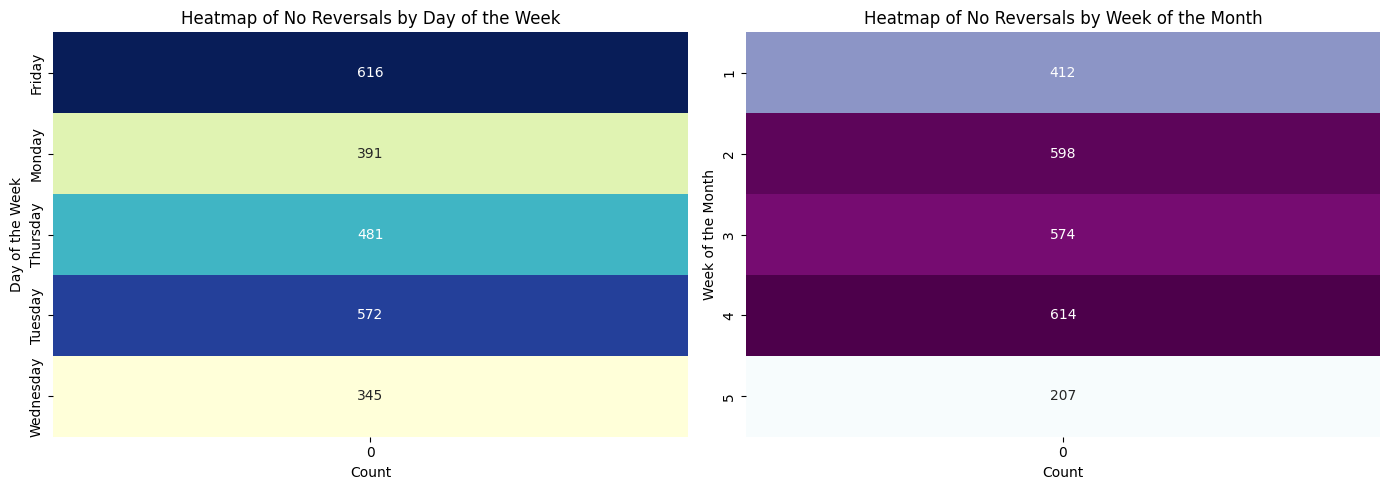

In [ ]:
# Check days with at least one reversal in Asian session + overlap
reversal_check = asian_and_overlap_data.groupby('Date')['Reversed'].any()

# Filter days with no reversals
days_with_no_reversal = reversal_check[reversal_check == False].index

# Display first 20 rows of days with no reversals
display(days_with_no_reversal[20:])

# Extract additional details about these days
df_no_reversals = data[data['Date'].isin(days_with_no_reversal)]

# Add columns for day of the week and week of the month
df_no_reversals['Day of Week'] = pd.to_datetime(df_no_reversals['Date']).dt.day_name()
df_no_reversals['Week of Month'] = pd.to_datetime(df_no_reversals['Date']).dt.day // 7 + 1

# Calculate occurrences by day of the week and week of the month
no_reversal_by_day = df_no_reversals['Day of Week'].value_counts().sort_index()
no_reversal_by_week = df_no_reversals['Week of Month'].value_counts().sort_index()

# Plotting the heatmaps
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Day of the Week Heatmap
sns.heatmap(no_reversal_by_day.values.reshape(-1, 1), annot=True, fmt="d", cmap="YlGnBu", cbar=False, ax=axs[0], yticklabels=no_reversal_by_day.index)
axs[0].set_title('Heatmap of No Reversals by Day of the Week')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Day of the Week')

# Week of the Month Heatmap
sns.heatmap(no_reversal_by_week.values.reshape(-1, 1), annot=True, fmt="d", cmap="BuPu", cbar=False, ax=axs[1], yticklabels=no_reversal_by_week.index)
axs[1].set_title('Heatmap of No Reversals by Week of the Month')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Week of the Month')

plt.tight_layout()
plt.show()

#Scatter Plot Of Average Asian Range Sizes Per Day
This analysis generates a scatter plot to visualize the average Asian range sizes per unique day for the pair's data. It highlights day-level trends in market movement.


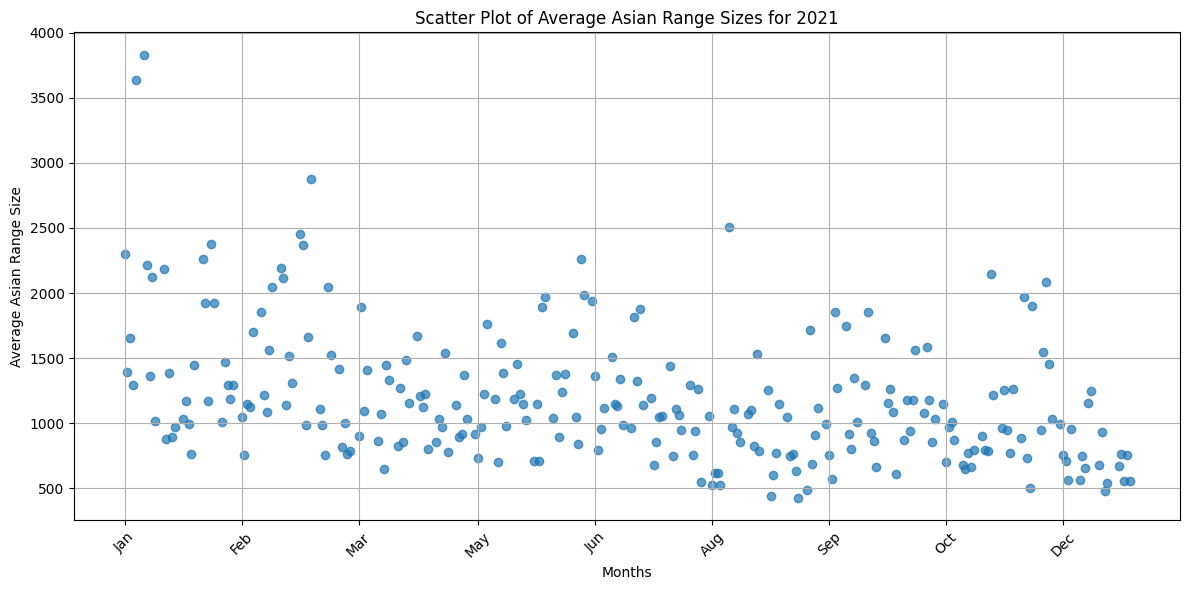

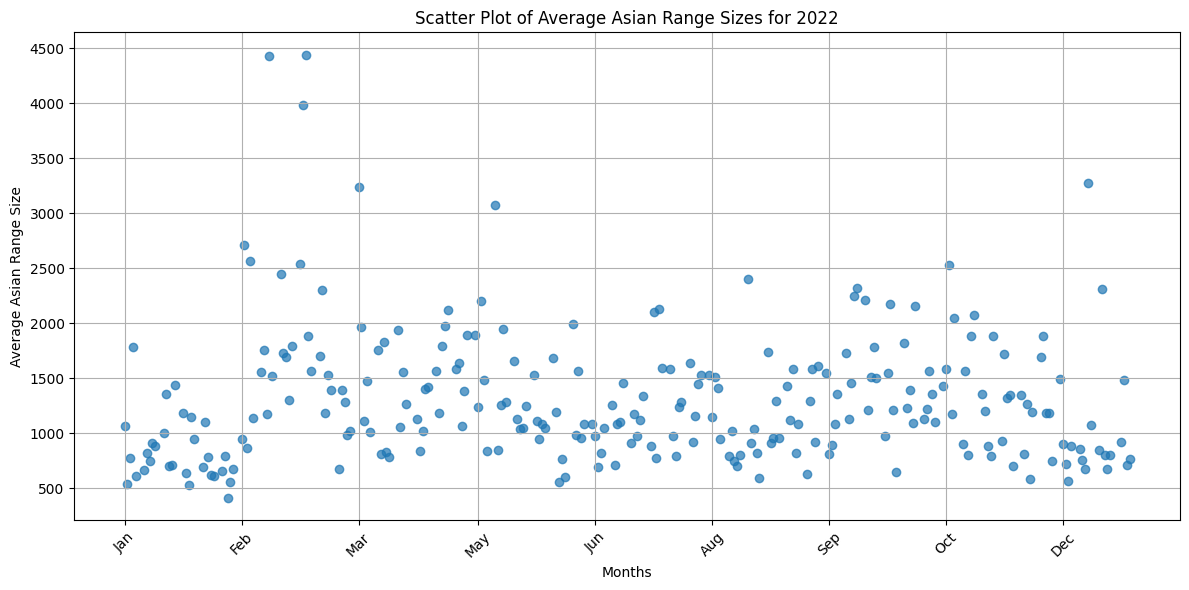

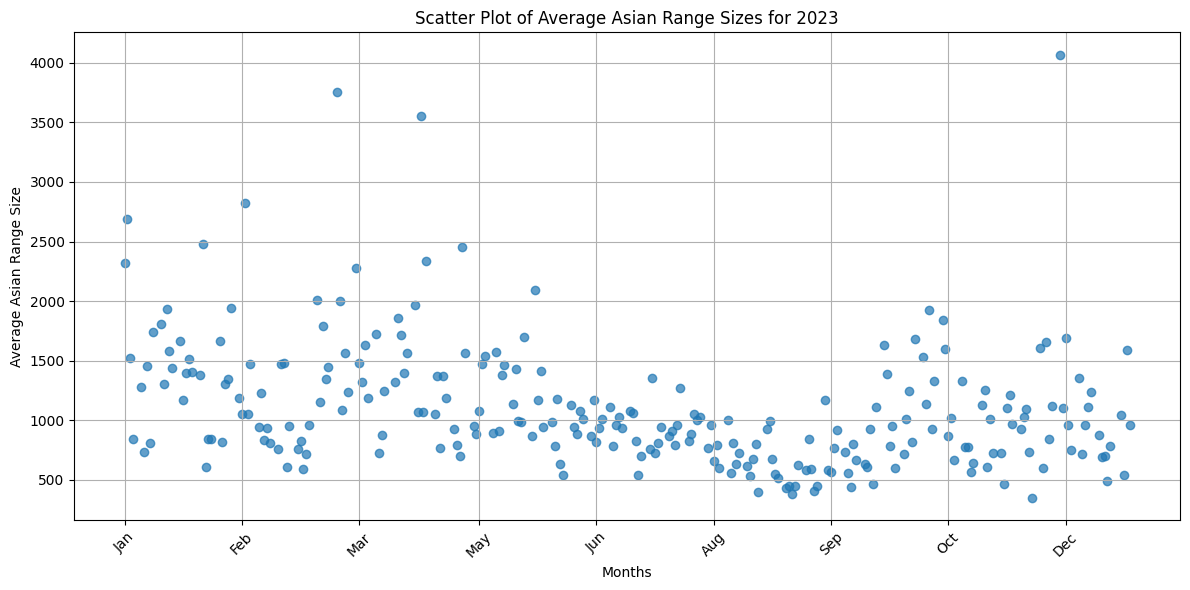

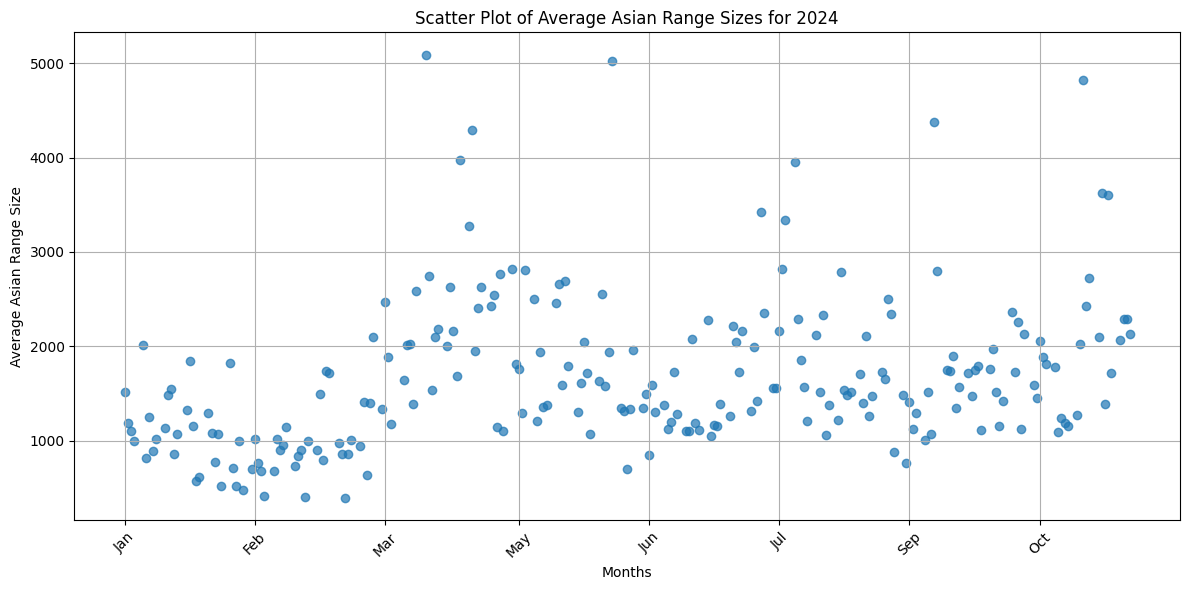

In [ ]:
# Create a copy of the 'Date' column for processing without modifying the original dataset
processed_dates = pd.to_datetime(asian_and_overlap_data['Date'], format='%Y.%m.%d')

# Group data by unique days and calculate the mean of 'Asian Range Size' per day
daily_range_sizes = asian_and_overlap_data.groupby(processed_dates)['Asian Range Size'].mean()

# Separate data by year
years = daily_range_sizes.index.year.unique()

# Generate plots for each year
for year in years:
    yearly_data = daily_range_sizes[daily_range_sizes.index.year == year]

    # Plot for the specific year
    plt.figure(figsize=(12, 6))
    plt.scatter(yearly_data.index, yearly_data, alpha=0.7)
    plt.title(f'Scatter Plot of Average Asian Range Sizes for {year}')
    plt.xlabel('Months')
    plt.ylabel('Average Asian Range Size')
    plt.xticks(yearly_data.index[::30], yearly_data.index[::30].strftime('%b'), rotation=45)  # Show monthly markers
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#Probability of Optimal and Adverse Trading Conditions in the Asian Session and Overlap
This section of code calculates the probability of experiencing optimal and adverse trading conditions during the Asian session and the Asian-London overlap.
* Optimal conditions are defined as times when retracements are above 68% and range sizes are below the third quartile.
* Adverse conditions are defined as times when retracements are below 68% or range sizes exceed the third quartile.


In [ ]:


# Calculate statistics for Asian Range Size
average_range_size = asian_and_overlap_data['Asian Range Size'].mean()
third_quartile_range_size = asian_and_overlap_data['Asian Range Size'].quantile(0.75)

# Define optimal conditions based on your criteria
optimal_conditions = asian_and_overlap_data[
    (asian_and_overlap_data['ZigZag Retracement'] >= 68) &               # Retracement above 68%
    (asian_and_overlap_data['Asian Range Size'] < third_quartile_range_size)  # Range size below third quartile
]

# Define adverse conditions based on your criteria
adverse_conditions = asian_and_overlap_data[
    #((asian_and_overlap_data['ZigZag Retracement'] > 29) & asian_and_overlap_data['ZigZag Retracement'] < 30) |                # Retracement below 68%
    (asian_and_overlap_data['Asian Range Size'] > third_quartile_range_size)  # Range size above third quartile
]

# Count occurrences by day, considering unique dates for daily impact
optimal_by_day = optimal_conditions.groupby('Date')['Day of Week'].first().value_counts()
optimal_by_week = optimal_conditions.groupby('Date')['Week of Month'].first().value_counts()
optimal_by_hour = optimal_conditions.groupby('Date')['Time of Day'].first().value_counts()

adverse_by_day = adverse_conditions.groupby('Date')['Day of Week'].first().value_counts()
adverse_by_week = adverse_conditions.groupby('Date')['Week of Month'].first().value_counts()
adverse_by_hour = adverse_conditions.groupby('Date')['Time of Day'].first().value_counts()

# Total number of unique days for calculating probabilities
total_days = asian_and_overlap_data['Date'].nunique()

# Calculate probabilities for optimal conditions by day, week, and hour
optimal_prob_by_day = (optimal_by_day / total_days) * 100
optimal_prob_by_week = (optimal_by_week / total_days) * 100
optimal_prob_by_hour = (optimal_by_hour / total_days) * 100

# Calculate probabilities for adverse conditions by day, week, and hour
adverse_prob_by_day = (adverse_by_day / total_days) * 100
adverse_prob_by_week = (adverse_by_week / total_days) * 100
# adverse_prob_by_hour = (adverse_by_hour / total_days) * 100


# Display results
print("Optimal Conditions Probability by Day of the Week:\n", optimal_prob_by_day)
print("Optimal Conditions Probability by Week of the Month:\n", optimal_prob_by_week)
print("Optimal Conditions Probability by Hour of the Day:\n", optimal_prob_by_hour)

print("\nAdverse Conditions Probability by Day of the Week:\n", adverse_prob_by_day)
print("Adverse Conditions Probability by Week of the Month:\n", adverse_prob_by_week)
# print("Adverse Conditions Probability by Hour of the Day:\n", adverse_prob_by_hour)
asian_and_overlap_data.head(20)

Optimal Conditions Probability by Day of the Week:
 Day of Week
WEDNESDAY    14.129353
THURSDAY     13.233831
TUESDAY      12.736318
FRIDAY       12.736318
MONDAY       10.845771
Name: count, dtype: float64
Optimal Conditions Probability by Week of the Month:
 Week of Month
2    15.422886
3    14.626866
4    14.328358
1    13.930348
5     5.373134
Name: count, dtype: float64
Optimal Conditions Probability by Hour of the Day:
 Time of Day
04:00    13.134328
03:00     8.656716
05:00     7.860697
09:00     7.064677
10:00     5.472637
08:00     4.577114
07:00     4.179104
11:00     4.079602
06:00     3.980100
02:00     3.084577
12:00     1.592040
Name: count, dtype: float64

Adverse Conditions Probability by Day of the Week:
 Day of Week
MONDAY       6.865672
TUESDAY      5.074627
THURSDAY     4.577114
FRIDAY       4.378109
WEDNESDAY    4.278607
Name: count, dtype: float64
Adverse Conditions Probability by Week of the Month:
 Week of Month
1    6.766169
3    6.169154
4    5.472637
2    5.1

,Date,Time of Day,Day of Week,Day of Month,Week of Month,Session,Session Overlap,ZigZag Current,ZigZag Previous,ZigZag Next,ZigZag Retracement,Price Open,Reversed,Asian Range Size,London Range Size,New York Range Size,Timezone
1,2021.01.04,02:00,MONDAY,4,1,Asian,False,0.00,0.00,0.00,0.00,1913.64,False,2300.0,0.0,1017.0,GMT+2
2,2021.01.04,03:00,MONDAY,4,1,Asian,False,0.00,0.00,0.00,0.00,1918.71,False,2300.0,0.0,1017.0,GMT+2
3,2021.01.04,04:00,MONDAY,4,1,Asian,False,0.00,0.00,0.00,0.00,1921.89,False,2300.0,0.0,1017.0,GMT+2
4,2021.01.04,05:00,MONDAY,4,1,Asian,False,0.00,0.00,0.00,0.00,1925.26,False,2300.0,0.0,0.0,GMT+2
5,2021.01.04,06:00,MONDAY,4,1,Asian,False,0.00,0.00,0.00,0.00,1923.71,False,2300.0,0.0,0.0,GMT+2
6,2021.01.04,07:00,MONDAY,4,1,Asian,False,0.00,0.00,0.00,0.00,1922.99,False,2300.0,0.0,0.0,GMT+2
7,2021.01.04,08:00,MONDAY,4,1,Asian,False,0.00,0.00,0.00,0.00,1925.60,False,2300.0,0.0,0.0,GMT+2
8,2021.01.04,09:00,MONDAY,4,1,Asian,False,0.00,0.00,0.00,0.00,1925.54,False,2300.0,0.0,0.0,GMT+2
9,2021.01.04,10:00,MONDAY,4,1,Asian/London,True,0.00,0.00,0.00,0.00,1935.16,False,2300.0,1655.0,0.0,GMT+2
10,2021.01.04,11:00,MONDAY,4,1,Asian/London,True,0.00,0.00,0.00,0.00,1933.94,False,2300.0,1655.0,0.0,GMT+2


In [ ]:
# Calculate individual probabilities for each condition in the Asian session and overlap data, based on unique days

# Total number of unique days in the dataset
total_days = asian_and_overlap_data['Date'].nunique()

# Condition 1: Probability of any retracement above 68% on a given day
retracement_68_data = asian_and_overlap_data[asian_and_overlap_data['ZigZag Retracement'] >= 68]
total_days_with_68_retracement = retracement_68_data['Date'].nunique()
prob_retracement_above_68 = (total_days_with_68_retracement / total_days) * 100

# Condition 2: Probability of range size below the third quartile on a given day
range_below_third_quartile_data = asian_and_overlap_data[asian_and_overlap_data['Asian Range Size'] < third_quartile_range_size]
total_days_with_range_below_third_quartile = range_below_third_quartile_data['Date'].nunique()
prob_range_below_third_quartile = (total_days_with_range_below_third_quartile / total_days) * 100

# Condition 3: Probability of any retracement below 68% on a given day
retracement_below_68_data = asian_and_overlap_data[asian_and_overlap_data['ZigZag Retracement'] < 68]
total_days_with_retracement_below_68 = retracement_below_68_data['Date'].nunique()
prob_retracement_below_68 = (total_days_with_retracement_below_68 / total_days) * 100

# Condition 4: Probability of range size above the third quartile on a given day
range_above_third_quartile_data = asian_and_overlap_data[asian_and_overlap_data['Asian Range Size'] > third_quartile_range_size]
total_days_with_range_above_third_quartile = range_above_third_quartile_data['Date'].nunique()
prob_range_above_third_quartile = (total_days_with_range_above_third_quartile / total_days) * 100

# Display probabilities
print("Probability of Retracement above 68%:", prob_retracement_above_68, "%")
print("Probability of Range Size below third quartile:", prob_range_below_third_quartile, "%")
print("Probability of Retracement below 68%:", prob_retracement_below_68, "%")
print("Probability of Range Size above third quartile:", prob_range_above_third_quartile, "%")


Probability of Retracement above 68%: 83.38308457711443 %
Probability of Range Size below third quartile: 76.61691542288557 %
Probability of Retracement below 68%: 100.0 %
Probability of Range Size above third quartile: 25.17412935323383 %
